Descripció:  
Aprèn a realitzar web scraping.

Objectius:
- Web scraping
- Documentar dades recollides amb web scraping

### Nivell 1
#### - Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.

In [1]:
import pandas as pd

### BeautifulSoup

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
URL = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'
page = requests.get(URL)

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
soup


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Mon, 21 Jun 2021 17:53:20 GMT" data-idioma="esp"><meta content="IE=11" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2021" id="ctl00_copyright" name="copyright"/><title>
	Bolsa de Madrid - Precios de la sesión
</title><link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" title="Bolsa de Madrid: R

In [6]:
for link in soup.find_all('a'): # It helps to find all anchor tag's
    print(link.get('href'))

/?id=ing
/esp/BMadrid/Contacto.aspx
/esp/Inversores/Agenda/HorarioMercado.aspx
/esp/aspx/Inversores/Agenda/Calendario.aspx
/esp/RSS.aspx
/?id=esp
https://www.bolsasymercados.es/
None
javascript:document.forms.formBusq.submitbusq();
/?id=esp
#
/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000
#
/esp/BMadrid/BMadrid.aspx
/docs/BMadrid/docsSubidos/Historia_Bolsa_ Española.pdf
#
/125_Palacio_Bolsa/
/esp/BMadrid/Palacio/Visita.aspx
/esp/BMadrid/Palacio/VisitaVirtual.aspx
/esp/BMadrid/Palacio/Eventos.aspx
/esp/aspx/Empresas/Eventos/Eventos.aspx?CodBolsa=BMadrid
#
/esp/aspx/Inversores/Formacion/Formacion.aspx?tipo=T&CodBolsa=BMadrid
#
/esp/BMadrid/Protector/Protector1.aspx
/esp/BMadrid/Protector/Protector21.aspx
/esp/BMadrid/Protector/Protector3.aspx
/esp/BMadrid/Protector/Protector4.aspx
#
/esp/aspx/Miembros/Miembros.aspx?tipo=T
javascript:sacaVentana('/docs/Miembros/Comosermiembro.pdf')
/esp/aspx/Regulacion/Regulacion.aspx
/docs/Miembros/TarifasRectoras.pdf
/esp/BMadrid/Localizacion.aspx


In [7]:
pprint(page)

Pretty printing has been turned OFF


In [8]:
# De tota la pàgina agafem només el contingut de la taula:
results = soup.find(id="ctl00_Contenido_tblAcciones")

In [9]:
results

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Últ.</th><th scope="col">% Dif.</th><th scope="col">Máx.</th><th scope="col">Mín.</th><th scope="col">Volumen</th><th scope="col">Efectivo (miles €)</th><th scope="col">Fecha</th><th class="Ult" scope="col">Hora</th>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">ACCIONA</a></td><td>127,4000</td><td class="DifClBj">-0,78</td><td>129,8000</td><td>126,3000</td><td>142.468</td><td>18.211,96</td><td align="center">21/06/2021</td><td align="center" class="Ult">17:35:11</td>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0132105018">ACERINOX</a></td><td>9,6880</td><td class="DifClBj">-0,47</td><td>9,8900</td><td>9,5500</td><td>4.856.585</td><td>47.370,40</td><td align="center">21/06/2021</td><td al

In [10]:
# Veiem l'html de la taula:
print(results.prettify())

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
 <tr align="center">
  <th scope="col">
   Nombre
  </th>
  <th scope="col">
   Últ.
  </th>
  <th scope="col">
   % Dif.
  </th>
  <th scope="col">
   Máx.
  </th>
  <th scope="col">
   Mín.
  </th>
  <th scope="col">
   Volumen
  </th>
  <th scope="col">
   Efectivo (miles €)
  </th>
  <th scope="col">
   Fecha
  </th>
  <th class="Ult" scope="col">
   Hora
  </th>
 </tr>
 <tr align="right">
  <td align="left" class="DifFlBj">
   <a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">
    ACCIONA
   </a>
  </td>
  <td>
   127,4000
  </td>
  <td class="DifClBj">
   -0,78
  </td>
  <td>
   129,8000
  </td>
  <td>
   126,3000
  </td>
  <td>
   142.468
  </td>
  <td>
   18.211,96
  </td>
  <td align="center">
   21/06/2021
  </td>
  <td align="center" class="Ult">
   17:35:11
  </td>
 </tr>
 <tr align="right">
  <td align="left" class="DifFlBj">
   <a href="/esp/aspx/Empresas/Fic

In [11]:
# Agafem només les accions que han pujat (class = 'DifFlSb')
acc_subidas = results.find_all('td', class_ = 'DifFlSb')

In [12]:
len(acc_subidas)

18

In [13]:
# Ja tenim només les accions que han pujat de preu:
for subida in acc_subidas:
    print(subida, end = '\n'*2)

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105046009">AENA</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=LU1598757687">ARCELORMIT.</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0113860A34">BA.SABADELL</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0113211835">BBVA</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0140609019">CAIXABANK</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105630315">CIE AUTOMOT.</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0130670112">ENDESA</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0118900010">FERROVIAL</a></td>

<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?I

In [14]:
for subida in acc_subidas:
    nombre_comp = subida.a.text
    print(nombre_comp)

AENA
ARCELORMIT.
BA.SABADELL
BBVA
CAIXABANK
CIE AUTOMOT.
ENDESA
FERROVIAL
FLUIDRA
IAG
IBERDROLA
INDITEX
INM.COLONIAL
MERLIN
REPSOL
SIEMENS GAME
TELEFONICA
VISCOFAN


En un sol run seria:

In [15]:
# Noms de les empreses que han pujat les seves accions en l'última actualització de la pàgina:

URL = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id="ctl00_Contenido_tblAcciones")
acc_subidas = results.find_all('td', class_ = 'DifFlSb')
print('Accions que han pujat:')
for subida in acc_subidas:
    nombre_comp = subida.a.text
    print(nombre_comp)

Accions que han pujat:
AENA
ARCELORMIT.
BA.SABADELL
BBVA
CAIXABANK
CIE AUTOMOT.
ENDESA
FERROVIAL
FLUIDRA
IAG
IBERDROLA
INDITEX
INM.COLONIAL
MERLIN
REPSOL
SIEMENS GAME
TELEFONICA
VISCOFAN


In [16]:
# Canviant només la classe trobem les accions que han pujat:

URL = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id="ctl00_Contenido_tblAcciones")
acc_bajadas = results.find_all('td', class_ = 'DifFlBj')
print('Accions que han baixat:')
for bajada in acc_bajadas:
    nombre_comp = bajada.a.text
    print(nombre_comp)

Accions que han baixat:
ACCIONA
ACERINOX
ACS
ALMIRALL
AMADEUS
B.SANTANDER
BANKINTER
GRIFOLS CL.A
INDRA A
MAPFRE
MELIA HOTELS
NATURGY
PHARMA MAR
R.E.C.
SOLARIA


In [62]:
name=""
price=""
nroFila=0
for fila in results.find_all("tr"):
    if nroFila==1:
        nroCelda=0
        for celda in fila.find_all('td'):
            if nroCelda==0:
                name=celda.text
                print("Indice:", name)
            if nroCelda==2:
                price=celda.text
                print("Valor:", price)
            nroCelda=nroCelda+1
    nroFila=nroFila+1

Indice: ACCIONA
Valor: -0,78


### Selenium

In [26]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

In [27]:
URL = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

In [28]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\ab\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


In [29]:
driver.get(URL)
print(driver.page_source)

<html xmlns="http://www.w3.org/1999/xhtml"><head data-idioma="esp" data-hora-act="Mon, 21 Jun 2021 17:53:41 GMT" data-app-path="/" data-bolsa="BMadrid" data-analytics-id="UA-35966870-2"><meta http-equiv="X-UA-Compatible" content="IE=11"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta id="ctl00_copyright" name="copyright" content="Copyright © BME 2021"><title>
	Bolsa de Madrid - Precios de la sesión
</title><link id="ctl00_RSSLink1" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Todo" title="Bolsa de Madrid: Todos los contenidos agregados"><link id="ctl00_RSSLink2" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" title="Bolsa de Madrid: Notas de Prensa"><link id="ctl00_RSSLink3" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" title="Bolsa de Madrid: Regulación: Circulares e Instrucciones Operativas"><link id="ctl00_RSSLink4" rel="alternate" type="appli

In [ ]:
# options = Options()
# options.headless = True
# options.add_argument("--window-size=1920,1200")

In [ ]:
# driver = webdriver.Chrome(options=options)

Printem l'html de la pàgina:

In [30]:
print(driver.title)

Bolsa de Madrid - Precios de la sesión


In [31]:
print(driver.current_url)

https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000


Agafem la taula que ens interessa, on hi ha totes les empreses de l'IBEX 35 i els canvis en les seves accions durant l'última jornada:

In [47]:
table = driver.find_element_by_id("ctl00_Contenido_tblAcciones")

De la taula agafem primer les accions que han pujat mitjançant la seva classe ('DifFlSb') i les que han baixat ('DifFlBj'):

In [49]:
acc_subidas = table.find_elements_by_class_name('DifFlSb')

In [52]:
acc_bajadas = table.find_elements_by_class_name('DifFlBj')

In [51]:
for i in acc_subidas:
    print(i.text)

AENA
ARCELORMIT.
BA.SABADELL
BBVA
CAIXABANK
CIE AUTOMOT.
ENDESA
FERROVIAL
FLUIDRA
IAG
IBERDROLA
INDITEX
INM.COLONIAL
MERLIN
REPSOL
SIEMENS GAME
TELEFONICA
VISCOFAN


In [53]:
for i in acc_bajadas:
    print(i.text)

ACCIONA
ACERINOX
ACS
ALMIRALL
AMADEUS
B.SANTANDER
BANKINTER
GRIFOLS CL.A
INDRA A
MAPFRE
MELIA HOTELS
NATURGY
PHARMA MAR
R.E.C.
SOLARIA


A continuació intentem scrapejar totes les dades de la taula i passar-les a un pandas dataframe. Comencem per agafar cada fila de la taula amb el tag ('tr') i n'extraiem el seu text:

In [80]:
rows = table.find_elements_by_tag_name('tr')
taula = []

for row in rows:
    x = row.text
    taula.append(x)

Separem el text de cada fila per tal de passar-lo a un pandas dataframe com una llista de llistes:

In [132]:
taula_split = []
for i in taula:
    x = i.split()
    taula_split.append(x)
    

In [133]:
columns=['Nombre', 'Últ.','% Dif.', 'Máx.', 'Mín.',' Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora', 'None']

In [134]:
taula_split.pop(0)

['Nombre', 'Últ.', '%', 'Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo', '(miles', '€)', 'Fecha', 'Hora']

In [135]:
df = pd.DataFrame(taula_split, columns=columns)

Veiem que per a alguns registres l'split ha separat de més el nom i tenim una columna de més:

In [136]:
df

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora,None
0,ACCIONA,"127,4000","-0,78","129,8000","126,3000",142.468,"18.211,96",21/06/2021,17:35:11,None
1,ACERINOX,"9,6880","-0,47","9,8900","9,5500",4.856.585,"47.370,40",21/06/2021,17:35:11,None
2,ACS,"24,3400","-0,25","24,8700","24,1900",926.967,"22.657,56",21/06/2021,17:35:11,None
3,AENA,"143,0000","0,56","143,0000","139,5500",120.786,"17.192,91",21/06/2021,17:35:11,None
4,ALMIRALL,"14,4600","-0,41","14,5900","14,3000",308.957,"4.461,78",21/06/2021,17:35:11,None
5,AMADEUS,"62,9800","-0,10","63,3800","61,3200",1.586.226,"99.413,36",21/06/2021,17:35:11,None
6,ARCELORMIT.,"24,3050","1,36","24,6350","22,8250",753.485,"17.985,52",21/06/2021,17:35:11,None
7,B.SANTANDER,"3,2800","-0,26","3,2950","3,2115",49.066.696,"160.070,16",21/06/2021,17:35:11,None
8,BA.SABADELL,"0,5910","0,41","0,5910","0,5650",46.830.529,"27.269,79",21/06/2021,17:35:11,None
9,BANKINTER,"4,2060","-0,57","4,2200","4,1220",2.515.103,"10.519,57",21/06/2021,17:35:11,None


Busquem aquests registres per intentar solucionar-ho i que encaixin totes les dades:

In [141]:
str_col = df[df['Últ.'].str.contains("[a-zA-Z]+")]

In [142]:
str_col

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora,None
13,CIE,AUTOMOT.,"25,0200","1,46","25,1800","24,4800",193.690,"4.830,12",21/06/2021,17:35:11
18,GRIFOLS,CL.A,"23,1100","-3,06","23,7500","22,9500",775.594,"18.011,61",21/06/2021,17:35:11
22,INDRA,A,"7,5500","-1,31","7,5850","7,3650",665.377,"4.986,75",21/06/2021,17:35:11
25,MELIA,HOTELS,"6,7680","-0,15","6,7880","6,5720",700.179,"4.707,16",21/06/2021,17:35:11
28,PHARMA,MAR,"73,1400","-5,46","77,0200","73,0800",129.344,"9.626,01",21/06/2021,17:35:11
31,SIEMENS,GAME,"26,6100","0,83","26,7800","26,0200",1.184.232,"31.338,34",21/06/2021,17:35:11


In [143]:
str_col['Nombre'] = str_col['Nombre'] + ' '+ str_col['Últ.']

<ipython-input-143-66d218f32238>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_col['Nombre'] = str_col['Nombre'] + ' '+ str_col['Últ.']


In [147]:
str_col.drop('Últ.', axis=1, inplace=True)

C:\Users\ab\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [148]:
str_col

,Nombre,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora,None
13,CIE AUTOMOT.,"25,0200","1,46","25,1800","24,4800",193.690,"4.830,12",21/06/2021,17:35:11
18,GRIFOLS CL.A,"23,1100","-3,06","23,7500","22,9500",775.594,"18.011,61",21/06/2021,17:35:11
22,INDRA A,"7,5500","-1,31","7,5850","7,3650",665.377,"4.986,75",21/06/2021,17:35:11
25,MELIA HOTELS,"6,7680","-0,15","6,7880","6,5720",700.179,"4.707,16",21/06/2021,17:35:11
28,PHARMA MAR,"73,1400","-5,46","77,0200","73,0800",129.344,"9.626,01",21/06/2021,17:35:11
31,SIEMENS GAME,"26,6100","0,83","26,7800","26,0200",1.184.232,"31.338,34",21/06/2021,17:35:11


In [153]:
df.drop('None', axis=1, inplace = True)

In [154]:
df.loc[df['Últ.'].str.contains("[a-zA-Z]+")] = str_col

Finalment tenim la taula scrapejada perfectament en un DataFrame:

In [155]:
df

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"127,4000","-0,78","129,8000","126,3000",142.468,"18.211,96",21/06/2021,17:35:11
1,ACERINOX,"9,6880","-0,47","9,8900","9,5500",4.856.585,"47.370,40",21/06/2021,17:35:11
2,ACS,"24,3400","-0,25","24,8700","24,1900",926.967,"22.657,56",21/06/2021,17:35:11
3,AENA,"143,0000","0,56","143,0000","139,5500",120.786,"17.192,91",21/06/2021,17:35:11
4,ALMIRALL,"14,4600","-0,41","14,5900","14,3000",308.957,"4.461,78",21/06/2021,17:35:11
5,AMADEUS,"62,9800","-0,10","63,3800","61,3200",1.586.226,"99.413,36",21/06/2021,17:35:11
6,ARCELORMIT.,"24,3050","1,36","24,6350","22,8250",753.485,"17.985,52",21/06/2021,17:35:11
7,B.SANTANDER,"3,2800","-0,26","3,2950","3,2115",49.066.696,"160.070,16",21/06/2021,17:35:11
8,BA.SABADELL,"0,5910","0,41","0,5910","0,5650",46.830.529,"27.269,79",21/06/2021,17:35:11
9,BANKINTER,"4,2060","-0,57","4,2200","4,1220",2.515.103,"10.519,57",21/06/2021,17:35:11


Guardem el dataframe:

In [156]:
df.to_csv(r'C:\Users\ab\Itacademy\Jupyter\ML\IBEX35Info.csv')

** Si tornem a fer correr l'scrapping amb selenium tindrem la taula de la variació de les accions del dia que la fem correr i serà diferent de la que tenim guardada.

### Nivell 2
#### - Exercici 2
Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

### Creació d'un dataset fent servir webscraping:


# Variació actualitzada del preu de les accions de l'IBEX 35


## Context

L'objectiu principal d'aquest dataset és obtenir en temps real els resultats de les sessions de l'IBEX 35. Hem fet servir la web:
- https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000



## Títol del dataset

El títol escollit és: IBEX35Info



## Descripció del dataset

Aquest dataset conté la informació principal relacionada amb la pujada i la baixada dels preus de les accions de les empreses de l'IBEX35 en temps real. Tenim el preu de tancada, la diferència percentual amb el dia anterior, la fluctuació dels preus durant el dia, el volum d'accions, el preu en €, la data i hora en que s'ha accedit a la pàgina web.  



## Contingut:

- Nombre: nom de l'empresa  
- Últ.: últim preu de les accions (en euros) 
- % Dif.: diferència percentual entre l'últim preu de les accions i el seu preu del dia anterior  
- Màx.: màxim preu al que han arribat les accions durant el dia
- Mín.: mínim preu al que han arribat les accions durant el dia
- Volumen: número d'accions de cada empresa  
- Efectivo (miles €): preu total de les accions (en milers d'euros)  
- Fecha: dia, més i any de la informació disponible (dd/mm/aaaa)  
- Hora: hora de la informació disponible (hh:mm). A partir de l'hora de tancament (17:35 hora espanyola) rebem 'cierre'.



## Codi i dataset

https://github.com/arampuig/Web-scraping



### Nivell 3
#### - Exercici 3
Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

Per a la part de web scraping amb Scrapy hem escollit un e-commerce, WhiskyShop, i hem extret el nom, el preu i el link de tots els whiskys escocesos en stock (https://www.whiskyshop.com/scotch-whisky?item_availability=In+Stock).

Per fer-ho hem creat un virtual environment i a continuació, mitjançant scrapy shell hem creat un nou projecte. Treballar des d'scrapy shell ens ha facilitat la tasca ja que quan encetes un nou projecte Scrapy et crea els arxius i directoris expressament pel projecte. Per parsejar hem fet servir el comandament 'fetch('la pàgina web que volem scrapejar)', que queda ammagatzemat a 'response' i des d'aquí hem buscat les dades que voliem amb atributs de css, com per exemple: 'response.css('div.product-item-info').get()'. A l'spider li hem afegit que scrapegés fins a l'última pàgina dels whiskys que hem escollit. En el nostre cas hem scrapejat 5 pàgines i més de 400 productes. Per elaborar l'spider hem treballat amb Visual Studio.

Al nostre repositori (https://github.com/arampuig/Web-scraping) penjarem l'arxiu amb les dades resultants i el codi corresponent a l'spider que hem fet servir. Un cop creada l'spider, només hem hagut de sortir d'scrapy shell, i des del nostre entorn virutal cridar el comandament: 'scrapy crawl ('nom de la nostra spider') -O ('nom de l'arxiu on guardem les dades').csv', per tal que scrapegés totes les pàgines amb els productes que buscavem i els emmagatzemés en el csv.

In [354]:
df = pd.read_csv(r'C:\Users\ab\anaconda3\envs\whiskeyscrape\whyskyscraper\whisky.csv')

In [355]:
df

,name,price,link
0,Balblair 2006 #78,£185.00,https://www.whiskyshop.com/balblair-2006-78-th...
1,The Octave Ben Nevis 2012 TWS Exclusive,£81.99,https://www.whiskyshop.com/the-octave-ben-nevi...
2,Fettercairn 16 Year Old 1st Release 2020 1 litre,£99.99,https://www.whiskyshop.com/fettercairn-16-year...
3,MacPhail's 21 Year Old Gordon & MacPhail,£125.00,https://www.whiskyshop.com/macphail-s-21-year-...
4,Glenlivet 1979 39 Year Old Gordon & MacPhail A...,"£1,149.00",https://www.whiskyshop.com/glenlivet-1979-39-y...
...,...,...,...
464,Glenmorangie Original,£45.00,https://www.whiskyshop.com/glenmorangie-original
465,The Black Grouse,£28.00,https://www.whiskyshop.com/the-black-grouse
466,Caol Ila 25 year old,£225.00,https://www.whiskyshop.com/caol-ila-25-year-old
467,Old Pulteney Stroma Liqueur,£29.00,https://www.whiskyshop.com/old-pulteney-stroma...


Eliminem el signe '£' i les comes (',') de la columna price i la passem a numèric:

In [356]:
df['price'].replace(to_replace= ['£', ','], value= '', regex=True, inplace=True)

In [357]:
df['price']

0       185.00
1        81.99
2        99.99
3       125.00
4      1149.00
        ...   
464      45.00
465      28.00
466     225.00
467      29.00
468        NaN
Name: price, Length: 469, dtype: object

In [358]:
df['price'] = pd.to_numeric(df['price'])

(array([439.,   7.,   1.,   1.,   3.,   1.,   1.,   0.,   0.,   1.]), array([7.00000e+00, 6.90630e+03, 1.38056e+04, 2.07049e+04, 2.76042e+04,
       3.45035e+04, 4.14028e+04, 4.83021e+04, 5.52014e+04, 6.21007e+04,
       6.90000e+04]), <BarContainer object of 10 artists>)

Text(0.5, 0, 'Price (£)')

Text(0.5, 1.0, 'Scotch Wiskey prices from Whisky Shop (log)')

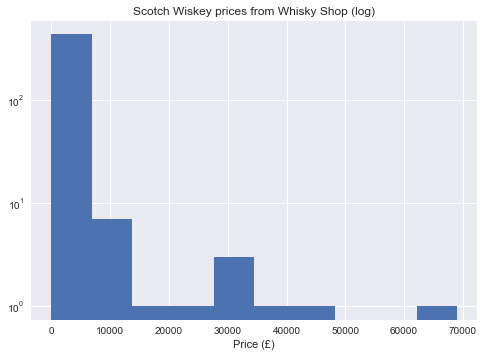

In [387]:
import matplotlib.pyplot as plt

x = df['price']
plt.style.use('seaborn')
plt.hist(x, log=True, bins=10)
plt.xlabel('Price (£)')
plt.title('Scotch Wiskey prices from Whisky Shop (log)')
plt.show()

In [380]:
df['price'].describe()

count      454.000000
mean      1142.032225
std       5232.745503
min          7.000000
25%         48.250000
50%         71.000000
75%        218.750000
max      69000.000000
Name: price, dtype: float64

Els rangs de preus del whisky escocès del nostre e-commerce va des dels 7 pounds als 69.000 l'ampolla. Fem un zoom i ens quedem només amb aquells que tenen un preu inferior a 220 pounds l'ampolla (75 percentil):

In [381]:
df['price'][df['price'] < 220]

0      185.00
1       81.99
2       99.99
3      125.00
13      74.95
        ...  
459     39.94
460     75.00
464     45.00
465     28.00
467     29.00
Name: price, Length: 340, dtype: float64

(array([10., 50., 54., 80., 46., 40., 16.,  8., 11.,  5.,  1.,  5.,  5.,
        8.,  1.]), array([  7.        ,  20.86666667,  34.73333333,  48.6       ,
        62.46666667,  76.33333333,  90.2       , 104.06666667,
       117.93333333, 131.8       , 145.66666667, 159.53333333,
       173.4       , 187.26666667, 201.13333333, 215.        ]), <BarContainer object of 15 artists>)

Text(0.5, 0, 'Price (£)')

Text(0.5, 1.0, 'Scotch Wisky prices < 200£ from Whisky Shop')

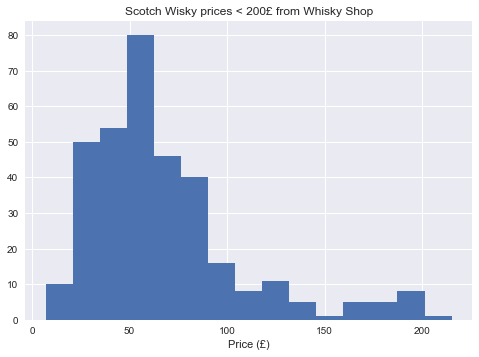

In [388]:
x = df['price'][df['price'] < 220]
plt.hist(x, bins=15)
plt.xlabel('Price (£)')
plt.title('Scotch Wisky prices < 200£ from Whisky Shop')
plt.show()

In [391]:
x.median()

55.995000000000005

In [392]:
x.mode()

0    50.0
dtype: float64

Podem observar que si agafem el 75 percentil de tot el whisky escocès, la seva mitjana és 67£ l'ampolla, en comptes dels 1142£ que teniem agafant totes les observacions.